In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'mglearn'

## 温室气体指数

In [78]:
aggi = pd.read_csv("AGGI_Table.csv")
ava_6 = pd.read_csv("avarangeof6.csv",index_col=0)
ava_6_1 = ava_6["1980":"2024"]
ava_6_1

,0
1980-01-01,-0.335108
1981-01-01,-0.268401
1982-01-01,-0.467499
1983-01-01,-0.284219
1984-01-01,-0.445476
1985-01-01,-0.483400
1986-01-01,-0.416187
1987-01-01,-0.281355
1988-01-01,-0.210572
1989-01-01,-0.325570


In [73]:
aggi_1 = aggi.iloc[3:47,1:].copy()
aggi_1.index = ava_6_1.index

In [104]:
aggi_g = pd.concat([aggi_1,ava_6_1],axis=1,names=[
    "CO2 (Gt)",
    "CH4 (Gt)",
    "N2O (Gt)",
    "CFCs (Gt)",
    "HCFCs (Gt)",
    "HFCs (Gt)",
    "TOTAL (Gt)",
    "CO2-eq (Gt)",
    "AGGI (Gt)",
    "changes (Gt)",'GMST'
])
aggi_g.columns = [
    "CO2 (Gt)",
    "CH4 (Gt)",
    "N2O (Gt)",
    "CFCs (Gt)",
    "HCFCs (Gt)",
    "HFCs (Gt)",
    "TOTAL (Gt)",
    "CO2-eq (Gt)",
    "AGGI (Gt)",
    "changes (Gt)",'GMST']

E:\machinelearn\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
E:\machinelearn\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
E:\machinelearn\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
E:\machinelearn\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
E:\machinelearn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\machinelearn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing 

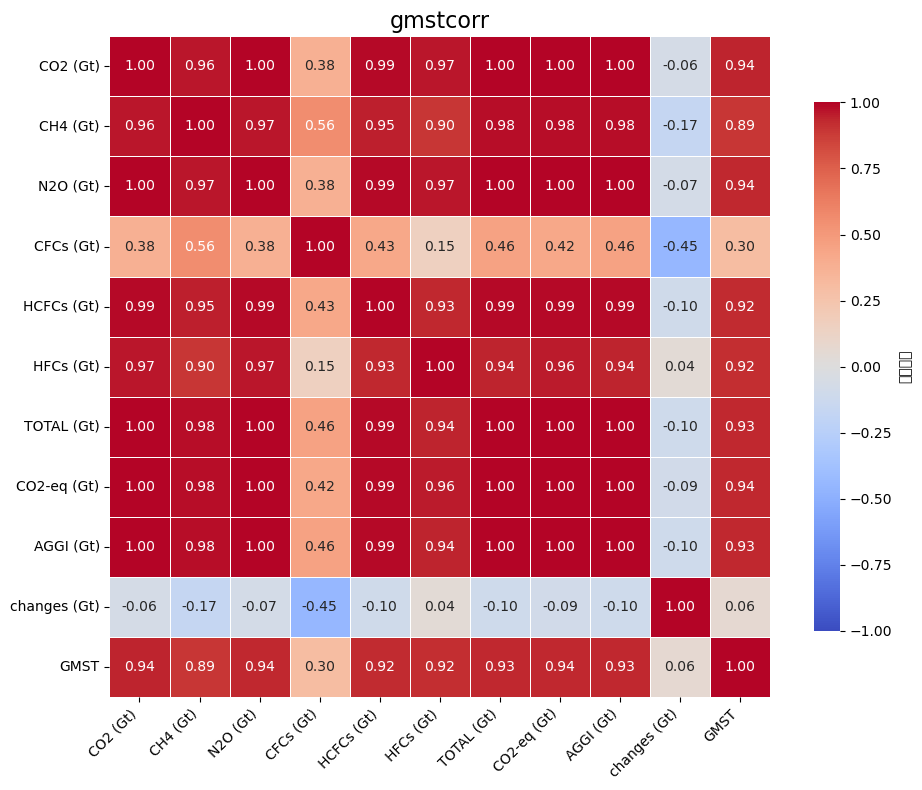

In [108]:
cc = aggi_g.corr(method='pearson')

import seaborn as sns
plt.figure(figsize=(10, 8)) # 设置图形的尺寸



heatmap = sns.heatmap(
    cc,    # 您计算得到的相关系数矩阵
    annot=True,            # 在单元格中显示数值 (annotates)
    cmap='coolwarm',       # 选择一个颜色映射方案 (colormap)
                           # 'coolwarm', 'RdBu_r', 'vlag' 等发散型色谱很适合相关系数
                           # '_r' 后缀表示反转颜色顺序
    fmt=".2f",             # 单元格中数值的格式，保留两位小数
    linewidths=.5,         # 单元格之间的线条宽度
    vmin=-1,               # 颜色映射的最小值 (相关系数范围是-1到1)
    vmax=1,                # 颜色映射的最大值
    center=0,              # 将颜色映射的中心设为0 (对于发散型色谱很重要)
    square=True,           # 使每个单元格都是正方形
    cbar=True,             # 是否显示颜色条 (默认是True)
    cbar_kws={"shrink": .8, "label": "相关系数"} # 颜色条的附加参数
)

plt.title('gmstcorr', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10) # 旋转X轴标签，使其更易读
plt.yticks(rotation=0, fontsize=10)             # Y轴标签
plt.tight_layout() # 调整布局，防止标签重叠或被截断
plt.show()

## 气象指数

In [2]:
data1 = pd.read_csv('data1.csv',index_col=0)
dgmst30 = pd.read_csv('dgmst30.csv',index_col=0)

In [3]:
dgmst1 = dgmst30['1950':'2023']

In [4]:
tezheng = np.zeros([876,1])
tezheng[(dgmst1>=1.99*dgmst1.std()).values]=1
tezheng = pd.DataFrame(tezheng,columns=['tezheng'],index=dgmst1.index)

In [5]:
dataall = pd.concat([data1,dgmst1,tezheng],names=[data1.columns,'dgmst','tezheng'],axis=1)

In [6]:
dataall

,DMI,AO,AMON,NAO,NINO,PDO,dgmst,tezheng
1950-01-01,-0.044,-0.060,0.105,0.55,-1.5,-1.61,0.068543,0.0
1950-02-01,-0.554,0.627,-0.040,3.31,-1.3,-2.17,0.056192,0.0
1950-03-01,-0.692,-0.008,-0.112,0.82,-1.2,-1.89,0.031011,0.0
1950-04-01,-0.475,0.555,-0.137,1.61,-1.2,-1.99,0.101427,0.0
1950-05-01,-0.309,0.072,-0.065,-1.73,-1.1,-3.19,0.010594,0.0
...,...,...,...,...,...,...,...,...
2022-08-01,-0.246,-0.170,0.358,-1.70,-0.9,-2.38,0.001984,0.0
2022-09-01,-0.322,-0.655,0.662,-3.73,-1.0,-2.29,-0.110009,0.0
2022-10-01,-0.691,1.346,0.483,0.86,-1.0,-1.81,-0.091534,0.0
2022-11-01,-0.269,0.339,0.282,2.37,-0.9,-2.41,0.072069,0.0


In [41]:
cc = dataall.corr(method='pearson')
cc_dgmst = cc["tezheng"]#(取出dgmst一列的数据)
cc_dgmst = cc_dgmst.drop("tezheng")


## 绘制**柱形图**

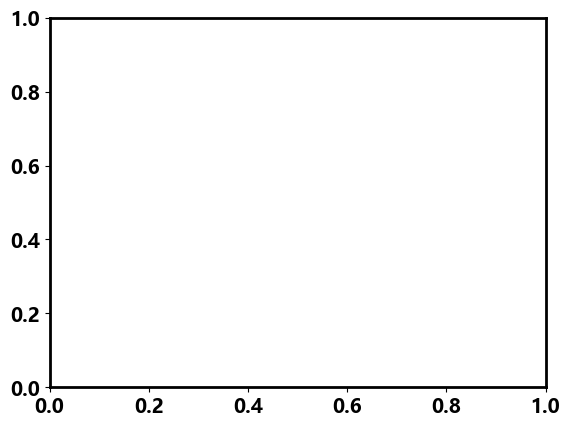

In [42]:
#===坐标轴加粗==
ax=plt.gca();#获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2);###设置右边坐标轴的粗细

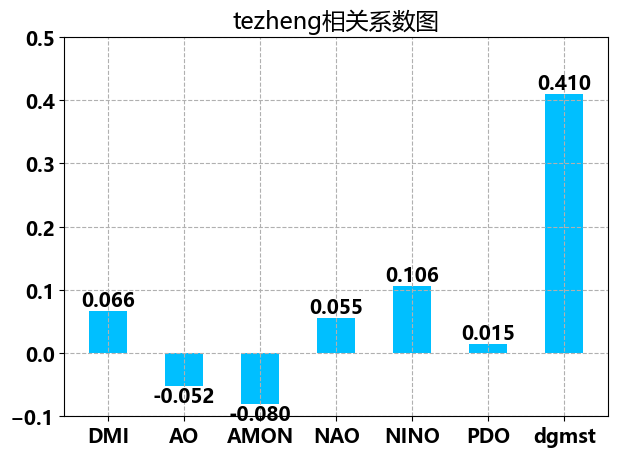

In [44]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 设置matplotlib整体用Times New Roman
mpl.rcParams['font.weight'] = 'bold'  # 设置matplotlib整体用Times New Roman
mpl.rcParams['font.size'] = 14  # 设置matplotlib整体用Times New Roman
plt.figure()
bars =plt.bar(cc_dgmst.index,cc_dgmst,width=0.5,color='deepskyblue')
plt.grid(linestyle='--')
plt.bar_label(bars,fmt = "%.3f")
plt.ylim([-0.1,0.5])
plt.title("tezheng相关系数图")
plt.tight_layout()

In [30]:
help(plt.bar_label)

Help on function bar_label in module matplotlib.pyplot:

bar_label(container: 'BarContainer', labels: 'ArrayLike | None' = None, *, fmt: 'str | Callable[[float], str]' = '%g', label_type: "Literal['center', 'edge']" = 'edge', padding: 'float' = 0, **kwargs) -> 'list[Annotation]'
    Label a bar plot.
    
    Adds labels to bars in the given `.BarContainer`.
    You may need to adjust the axis limits to fit the labels.
    
    Parameters
    ----------
    container : `.BarContainer`
        Container with all the bars and optionally errorbars, likely
        returned from `.bar` or `.barh`.
    
    labels : array-like, optional
        A list of label texts, that should be displayed. If not given, the
        label texts will be the data values formatted with *fmt*.
    
    fmt : str or callable, default: '%g'
        An unnamed %-style or {}-style format string for the label or a
        function to call with the value as the first argument.
        When *fmt* is a string and can 

E:\machinelearn\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
E:\machinelearn\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
E:\machinelearn\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
E:\machinelearn\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
E:\machinelearn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\machinelearn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing 

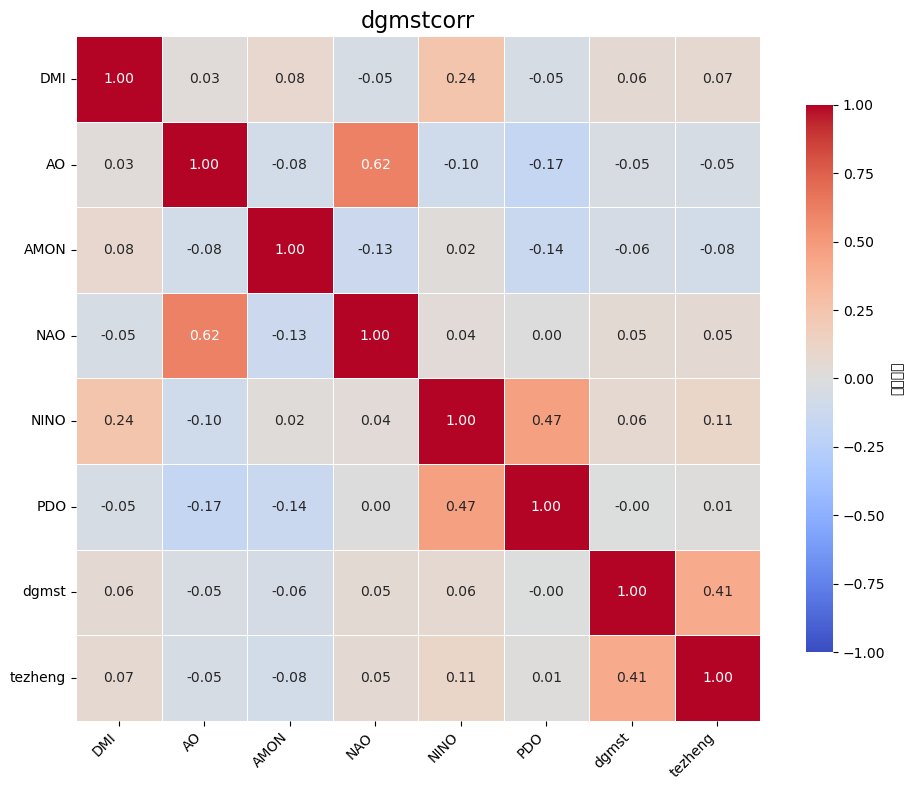

In [109]:
cc = dataall.corr(method='pearson')
import seaborn as sns
plt.figure(figsize=(10, 8)) # 设置图形的尺寸

cc = dataall.corr(method='pearson')# 绘制热力
图
heatmap = sns.heatmap(
    cc,    # 您计算得到的相关系数矩阵
    annot=True,            # 在单元格中显示数值 (annotates)
    cmap='coolwarm',       # 选择一个颜色映射方案 (colormap)
                           # 'coolwarm', 'RdBu_r', 'vlag' 等发散型色谱很适合相关系数
                           # '_r' 后缀表示反转颜色顺序
    fmt=".2f",             # 单元格中数值的格式，保留两位小数
    linewidths=.5,         # 单元格之间的线条宽度
    vmin=-1,               # 颜色映射的最小值 (相关系数范围是-1到1)
    vmax=1,                # 颜色映射的最大值
    center=0,              # 将颜色映射的中心设为0 (对于发散型色谱很重要)
    square=True,           # 使每个单元格都是正方形
    cbar=True,             # 是否显示颜色条 (默认是True)
    cbar_kws={"shrink": .8, "label": "相关系数"} # 颜色条的附加参数
)

plt.title('dgmstcorr', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10) # 旋转X轴标签，使其更易读
plt.yticks(rotation=0, fontsize=10)             # Y轴标签
plt.tight_layout() # 调整布局，防止标签重叠或被截断
plt.show()

In [111]:
nino = data1['NINO']

In [144]:
tnino = np.zeros([876,1])
tnino[nino>=0.5]=1
tnino[nino<=-0.5]=1
tnino = pd.DataFrame(tnino,columns=['tnino'],index=dgmst1.index)
datatest = pd.concat([dataall,tnino],axis=1)
datatest

,DMI,AO,AMON,NAO,NINO,PDO,dgmst,tezheng,tnino
1950-01-01,-0.044,-0.060,0.105,0.55,-1.5,-1.61,0.068543,0.0,1.0
1950-02-01,-0.554,0.627,-0.040,3.31,-1.3,-2.17,0.056192,0.0,1.0
1950-03-01,-0.692,-0.008,-0.112,0.82,-1.2,-1.89,0.031011,0.0,1.0
1950-04-01,-0.475,0.555,-0.137,1.61,-1.2,-1.99,0.101427,0.0,1.0
1950-05-01,-0.309,0.072,-0.065,-1.73,-1.1,-3.19,0.010594,0.0,1.0
...,...,...,...,...,...,...,...,...,...
2022-08-01,-0.246,-0.170,0.358,-1.70,-0.9,-2.38,0.001984,0.0,1.0
2022-09-01,-0.322,-0.655,0.662,-3.73,-1.0,-2.29,-0.110009,0.0,1.0
2022-10-01,-0.691,1.346,0.483,0.86,-1.0,-1.81,-0.091534,0.0,1.0
2022-11-01,-0.269,0.339,0.282,2.37,-0.9,-2.41,0.072069,0.0,1.0


E:\machinelearn\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
E:\machinelearn\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
E:\machinelearn\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
E:\machinelearn\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
E:\machinelearn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\machinelearn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing 

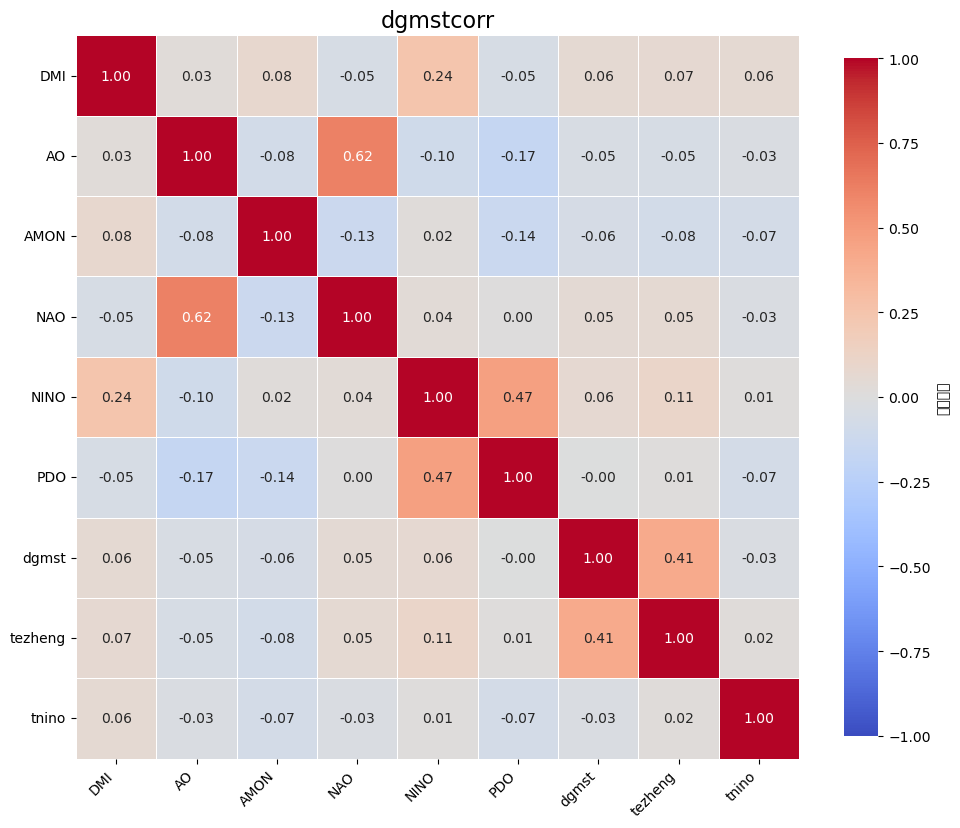

In [146]:
cc = datatest.corr(method='pearson')
import seaborn as sns
plt.figure(figsize=(10, 9)) # 设置图形的尺寸



heatmap = sns.heatmap(
    cc,    # 您计算得到的相关系数矩阵
    annot=True,            # 在单元格中显示数值 (annotates)
    cmap='coolwarm',       # 选择一个颜色映射方案 (colormap)
                           # 'coolwarm', 'RdBu_r', 'vlag' 等发散型色谱很适合相关系数
                           # '_r' 后缀表示反转颜色顺序
    fmt=".2f",             # 单元格中数值的格式，保留两位小数
    linewidths=.5,         # 单元格之间的线条宽度
    vmin=-1,               # 颜色映射的最小值 (相关系数范围是-1到1)
    vmax=1,                # 颜色映射的最大值
    center=0,              # 将颜色映射的中心设为0 (对于发散型色谱很重要)
    square=True,           # 使每个单元格都是正方形
    cbar=True,             # 是否显示颜色条 (默认是True)
    cbar_kws={"shrink": .8, "label": "相关系数"} # 颜色条的附加参数
)

plt.title('dgmstcorr', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10) # 旋转X轴标签，使其更易读
plt.yticks(rotation=0, fontsize=10)             # Y轴标签
plt.tight_layout() # 调整布局，防止标签重叠或被截断
plt.show()